# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [150]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [151]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [152]:
#  1. Get the total rides for each city type

rides_city_type = pyber_data_df.groupby(['type']).count()['ride_id']

In [153]:
# 2. Get the total drivers for each city type
drivers_city_type = city_data_df.groupby(['type']).sum()['driver_count']

In [154]:
#  3. Get the total amount of fares for each city type
fares_city_type = pyber_data_df.groupby('type').sum()['fare']

In [155]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_city_type / rides_city_type

In [156]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = fares_city_type / drivers_city_type

In [157]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'Total Rides': rides_city_type,
    'Total Drivers': drivers_city_type,
    'Total Fares': fares_city_type,
    'Average Fare per Ride': avg_fare_per_ride,
    'Average Fare per Driver': avg_driver_fare
})

In [158]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [159]:
#  8. Format the columns.
pyber_summary_df.loc[:, 'Total Fares':] = pyber_summary_df.loc[:, 'Total Fares':].applymap("${:,.2f}".format)
pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [160]:
# 1. Read the merged DataFrame
pyber_data_multi_df = pyber_data_df.set_index(['type', 'date'])
pyber_data_multi_df

city   fare        ride_id  \
type  date                                                            
Urban 2019-01-14 10:14:22  Lake Jonathanshire  13.83  5739410935873   
      2019-03-04 18:24:09  South Michelleport  30.24  2343912425577   
      2019-02-24 04:29:00  Port Samanthamouth  33.44  2005065760003   
      2019-02-10 23:22:03          Rodneyfort  23.44  5149245426178   
      2019-03-06 04:28:35          South Jack  34.58  3908451377344   
...                                       ...    ...            ...   
Rural 2019-04-29 17:04:39         Michaelberg  13.38  8550365057598   
      2019-01-30 00:05:47     Lake Latoyabury  20.76  9018727594352   
      2019-02-10 21:03:50         North Jaime  11.11  2781339863778   
      2019-05-07 19:22:15        West Heather  44.94  4256853490277   
      2019-04-25 10:20:13          Newtonview  55.84  9990581345298   

                           driver_count  
type  date                               
Urban 2019-01-14 10:14:22             5  
      2019-03-04 18:24:09            72  
      2019-02-24 04:29:00            57  
      2019-02-10 23:22:03            34  
      2019-03-06 04:28:35            46  
...                                 ...  
Rural 2019-04-29 17:04:39             6  
      2019-01-30 00:05:47             2  
      2019-02-10 21:03:50             1  
      2019-05-07 19:22:15             4  
      2019-04-25 10:20:13             1  

[2375 rows x 4 columns]

In [161]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_multi_df.groupby(['type', 'date']).sum()['fare']

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [162]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_multi_df = pyber_data_multi_df.reset_index()
pyber_data_multi_df

,type,date,city,fare,ride_id,driver_count
0,Urban,2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5
1,Urban,2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72
2,Urban,2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57
3,Urban,2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34
4,Urban,2019-03-06 04:28:35,South Jack,34.58,3908451377344,46
...,...,...,...,...,...,...
2370,Rural,2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6
2371,Rural,2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2
2372,Rural,2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1
2373,Rural,2019-05-07 19:22:15,West Heather,44.94,4256853490277,4


In [163]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_multi_df = pyber_data_multi_df.pivot(index='date', columns='type', values='fare')
pyber_data_multi_df.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,NaN,NaN,24.20
2019-05-07 20:22:19,NaN,NaN,18.74
2019-05-07 20:40:29,NaN,24.89,NaN
2019-05-08 01:54:18,NaN,NaN,32.69
2019-05-08 02:31:25,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55
2019-05-08 11:38:35,NaN,NaN,19.77


In [164]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
pyber_data_filter_df = pyber_data_multi_df.loc['2019-01-01':'2019-04-28']
pyber_data_filter_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [165]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_data_filter_df.index = pd.to_datetime(pyber_data_filter_df.index)

In [166]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_filter_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [167]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_resample_df = pyber_data_filter_df.resample("W").sum()
pyber_data_resample_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [168]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



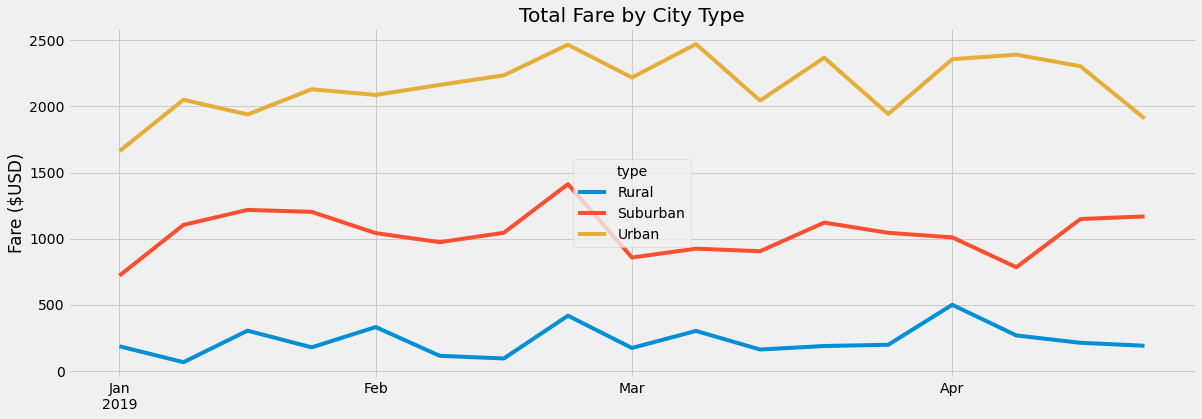

In [169]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pyber_data_resample_df.index, pyber_data_resample_df.Rural, label='Rural')
ax.plot(pyber_data_resample_df.index, pyber_data_resample_df.Suburban, label='Suburban')
ax.plot(pyber_data_resample_df.index, pyber_data_resample_df.Urban, label='Urban')


# Format the graph
ylab = ax.set_ylabel('Fare ($USD)')
ax.set_xlabel(None)
ax.set_xticks(['2019-01-06', '2019-02-03', '2019-03-03', '2019-04-07'])
ax.set_xticklabels(['Jan\n2019', 'Feb', 'Mar', 'Apr']) 
ax.set_title("Total Fare by City Type")
plt.legend(loc='center', title='type')

plt.savefig('analysis/PyBer_fare_summary.png')
